# Import Statements-

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import shuffle

# Loading and preprocessing the raw data to a .csv file-

In [3]:
# The data is given in the form of .txt files. Here we convert the data into a .csv file 
# and save it under the 'train' and 'test' directories for further use. Also the data here is 
# arranged according to the subject ID. Therefore to break any correlation that may exists 
# between the datapoints, we shuffle the dataset before dividing it into public and private 
# datasets to be used in the Neural Network model.
features = []
with open("./UCI HAR Dataset/features.txt") as file:
    for line in file:
        features.append(line.split()[1])
        
# Renaming duplicate column names
names = []
count = {}
for feature in features:
    if(features.count(feature) > 1):
        names.append(feature)
for name in names:
    count[name] = features.count(name)

for i in range(len(features)):
    if(features[i] in names):
        num = count[features[i]]
        count[features[i]] -= 1;
        features[i] = str(features[i] + str(num))
        

train_df = pd.read_csv("./UCI HAR Dataset/train/X_train.txt", delim_whitespace = True,names= features)
train_df['subject_id'] = pd.read_csv("./UCI HAR Dataset/train/subject_train.txt",header= None,squeeze=True)
train_df["activity"] = pd.read_csv("./UCI HAR Dataset/train/y_train.txt", header = None, squeeze = True)
activity = pd.read_csv("./UCI HAR Dataset/train/y_train.txt", header = None, squeeze = True)
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
train_df["activity_name"] = label_name
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [4]:
test_df = pd.read_csv("./UCI HAR Dataset/test/X_test.txt", delim_whitespace = True, names = features)
test_df['subject_id'] = pd.read_csv("./UCI HAR Dataset/test/subject_test.txt",header= None,squeeze=True)
test_df["activity"] = pd.read_csv("./UCI HAR Dataset/test/y_test.txt", header = None, squeeze = True)
activity = pd.read_csv("./UCI HAR Dataset/test/y_test.txt", header = None, squeeze = True)
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
test_df["activity_name"] = label_name
test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


# Saving train and test data to a resuable .csv file-

In [5]:
train_df = shuffle(train_df)
test_df = shuffle(test_df)
train_df.to_csv("./UCI HAR Dataset/train/train.csv", index = False)
test_df.to_csv("./UCI HAR Dataset/test/test.csv", index = False)

# Loading the data from the .csv file-

In [6]:
train_df = pd.read_csv('./UCI HAR Dataset/train/train.csv')
test_df = pd.read_csv('./UCI HAR Dataset/test/test.csv')
train_df['activity'] -= 1;
test_df['activity'] -= 1;

y_train = train_df['activity']
X_train = train_df.drop(['activity','activity_name','subject_id'],axis=1)
y_test = test_df['activity']
X_test = test_df.drop(['activity','activity_name','subject_id'],axis=1)

# Visualizing the data-

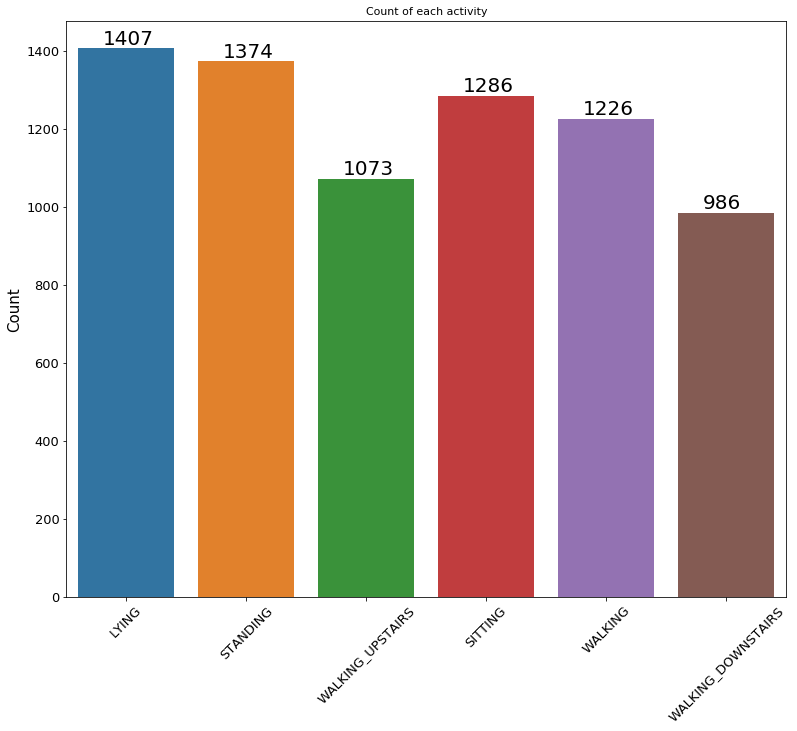

In [7]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 11)
plt.tick_params(labelsize = 10)
sns.countplot(x='activity_name' , data = train_df)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2 , y = i.get_height() + 10, s = str(i.get_height()), fontsize=20)
plt.xlabel('')
plt.ylabel('Count',fontsize =15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 45)
plt.show()

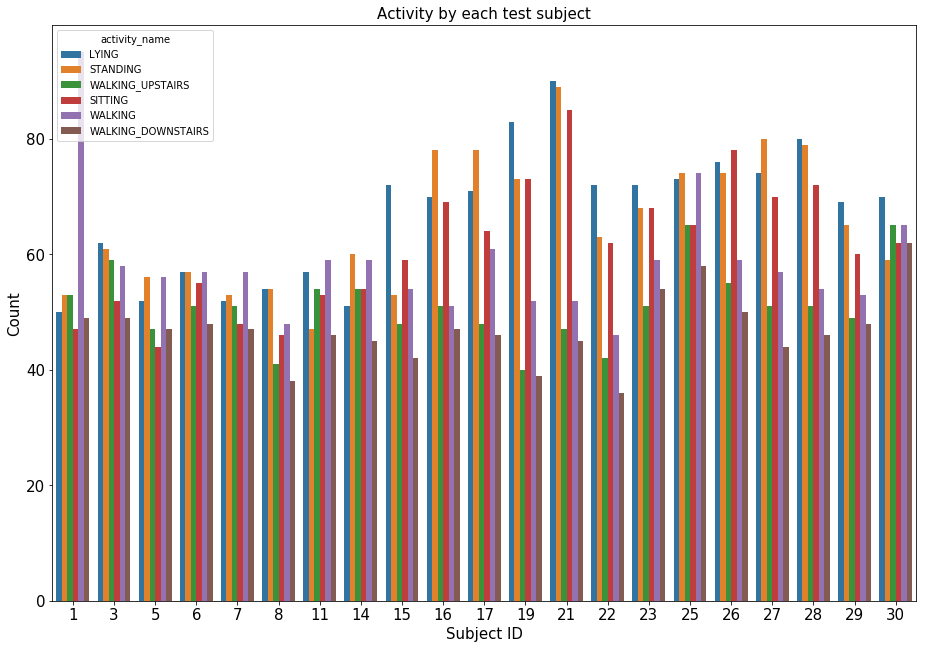

In [8]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Activity by each test subject", fontsize = 15)
plt.tick_params(labelsize = 15)
sns.countplot(x = 'subject_id', hue = "activity_name", data = train_df)
plt.xlabel("Subject ID", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

# Global variables and Function declarations-

In [9]:
# Variables-
epochs = 25
batch_size = 64
num_classes = 6
fig_size = (9,7)

In [401]:
# FUNCTIONS-
def PREPROCESS(X , y):
    scaler = MinMaxScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    y = np.array(y)
    return X,y

def CREATE_MODEL(input_shape):
    model = Sequential()
    model.add(Input(shape = input_shape,))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    return model

def COMPILE(model):
    model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
    return model;
    
def FIT(model,X,y,i):
    history = model.fit(
    X,
    y,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(f'./model_{i}.h5', save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.1,
            patience=1
        )
    ],
    verbose=0
    )
    return history,model

def PLOT(history,i):
    epochs_range = range(epochs)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=fig_size)
    plt.plot(epochs_range,train_loss,label="Training Loss")
    plt.plot(epochs_range,val_loss,label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Model {i} - Loss Over Time")
    plt.show()
    
    plt.figure(figsize=fig_size)
    plt.plot(epochs_range,train_acc,label="Training accuracy")
    plt.plot(epochs_range,val_acc,label="Validation accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.title(f"Model {i} - Accuracy")
    plt.show()

def CONFUSION_MATRIX(y_test, y_pred):
    confusionMatrix = confusion_matrix(y_test, y_pred)
    sns.set(font_scale=1.5)
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LYING"]
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatrix, cmap = "Blues", annot = True, fmt = ".0f", xticklabels=labels, yticklabels=labels)
    plt.title("Global Model Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 45)
    plt.show()
    
def LOAD_MODELS():
    for i in range(1,4):
        model = load_model(f'./model_{i}.h5')
        all_models.append(model)

def APPLY_WEIGHT_FUNCTION(weights):
    avg_model_weights = []
    n_models = len(all_models)
    n_layers = len(all_models[0].get_weights())
    for layer in range(n_layers):
        layer_weights = np.array([model.get_weights()[layer] for model in all_models])
        avg_layer_weights = np.average(layer_weights, axis=0, weights=weights)
        avg_model_weights.append(avg_layer_weights)
    return avg_model_weights;

# Model replica number-1 

In [380]:
# MODEL REPLICA NO.1
X_train_1 = X_train[0:2500]
y_train_1 = y_train[0:2500]

In [381]:
X_train_1, y_train_1 = PREPROCESS(X_train_1,y_train_1);

In [382]:
model_1 = CREATE_MODEL(X_train_1.shape[1]);
model_1.summary()

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_272 (Dense)            (None, 256)               143872    
_________________________________________________________________
dropout_164 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_273 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_165 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_274 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_166 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_275 (Dense)            (None, 32)              

In [383]:
model_1 = COMPILE(model_1)
history_1,model_1 = FIT(model_1,X_train_1,y_train_1,1)

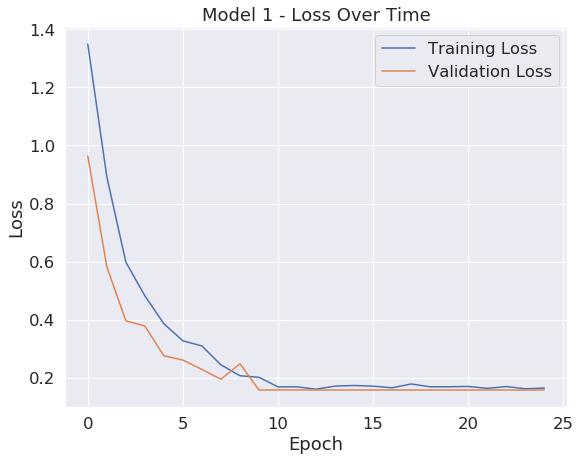

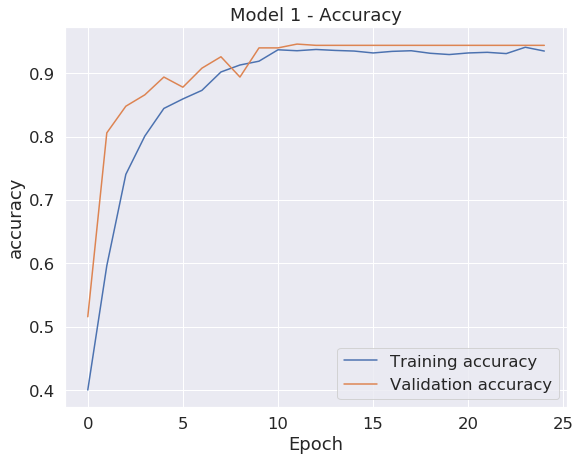

In [384]:
PLOT(history_1,1)

# Model replica number-2

In [385]:
# MODEL REPLICA NO.2
X_train_2 = X_train[2500:5000]
y_train_2 = y_train[2500:5000]

In [386]:
X_train_2, y_train_2 = PREPROCESS(X_train_2,y_train_2)

In [387]:
model_2 = CREATE_MODEL(X_train_2.shape[1])
model_2.summary()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_277 (Dense)            (None, 256)               143872    
_________________________________________________________________
dropout_167 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_278 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_168 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_279 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_169 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_280 (Dense)            (None, 32)              

In [388]:
model_2 = COMPILE(model_2)
history_2,model_2 = FIT(model_2,X_train_2,y_train_2,2);

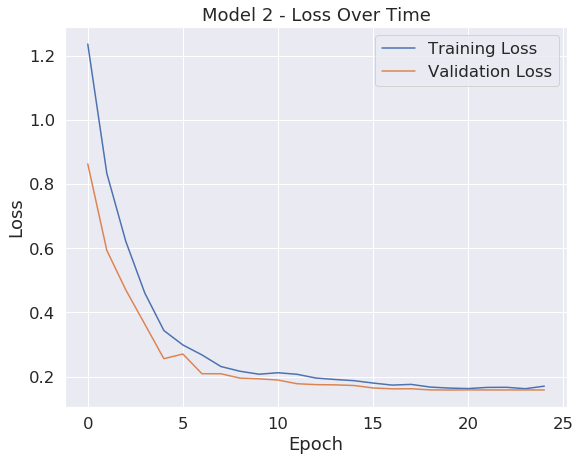

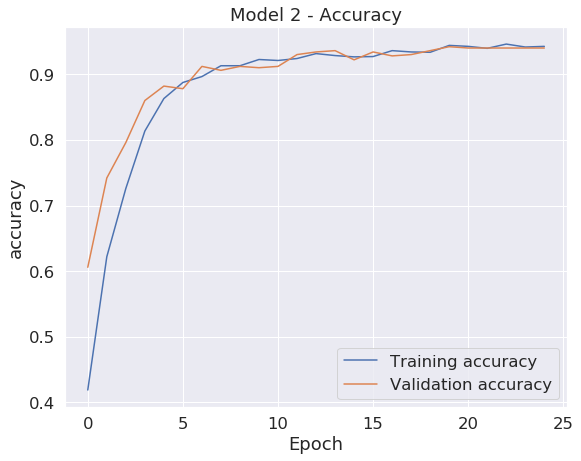

In [389]:
PLOT(history_2,2);

# Model replica number-3

In [390]:
# MODEL REPLICA NO.3
X_train_3 = X_train[5000:-1]
y_train_3 = y_train[5000:-1]

In [391]:
X_train_3, y_train_3 = PREPROCESS(X_train_3,y_train_3)

In [392]:
model_3 = CREATE_MODEL(X_train_3.shape[1])
model_3.summary()

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_282 (Dense)            (None, 256)               143872    
_________________________________________________________________
dropout_170 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_283 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_171 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_284 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_172 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_285 (Dense)            (None, 32)              

In [393]:
model_3 = COMPILE(model_3);
history_3, model_3 = FIT(model_3,X_train_3,y_train_3,3)

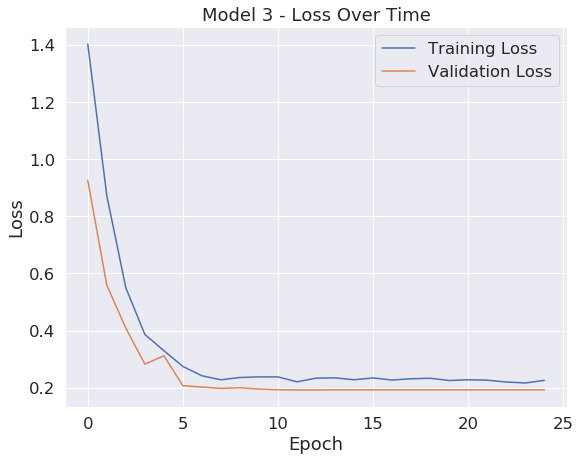

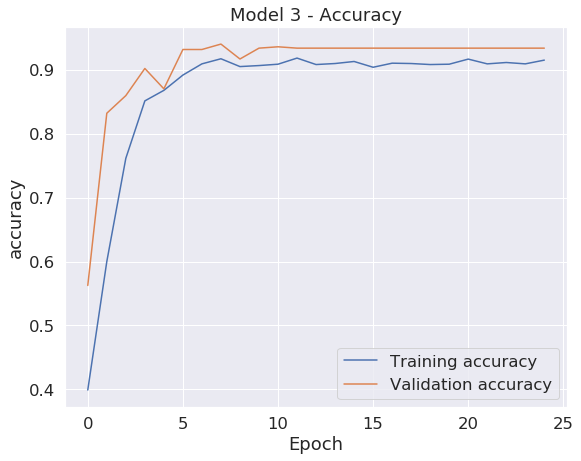

In [394]:
PLOT(history_3,3)

# The global model

In [395]:
X_test, y_test = PREPROCESS(X_test, y_test)

In [396]:
model_g = CREATE_MODEL(X_test.shape[1])
model_g.summary()

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_287 (Dense)            (None, 256)               143872    
_________________________________________________________________
dropout_173 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_288 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_174 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_289 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_175 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_290 (Dense)            (None, 32)              

In [397]:
all_models = []
LOAD_MODELS()

In [398]:
weights = [max(history_1.history['accuracy']), max(history_2.history['accuracy']), max(history_3.history['accuracy'])]
x = max(weights)
idx = weights.index(x)
weights[idx] = 1
x = min(weights)
idx = weights.index(x)
weights[idx] = 0.02
for i in range(3):
    if(weights[i] != 1 and weights[i] != 0.02):
        weights[i] = 0.03
        break
avg_model_weights = APPLY_WEIGHT_FUNCTION(weights)

In [399]:
model_g.set_weights(avg_model_weights)
model_g = COMPILE(model_g)
_ , accuracy = model_g.evaluate(X_test,y_test,verbose=0)
print(f"Global Model Accuracy: {round(accuracy*100,2)}%")

Global Model Accuracy: 91.35%


In [ ]:
y_pred = model_g.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

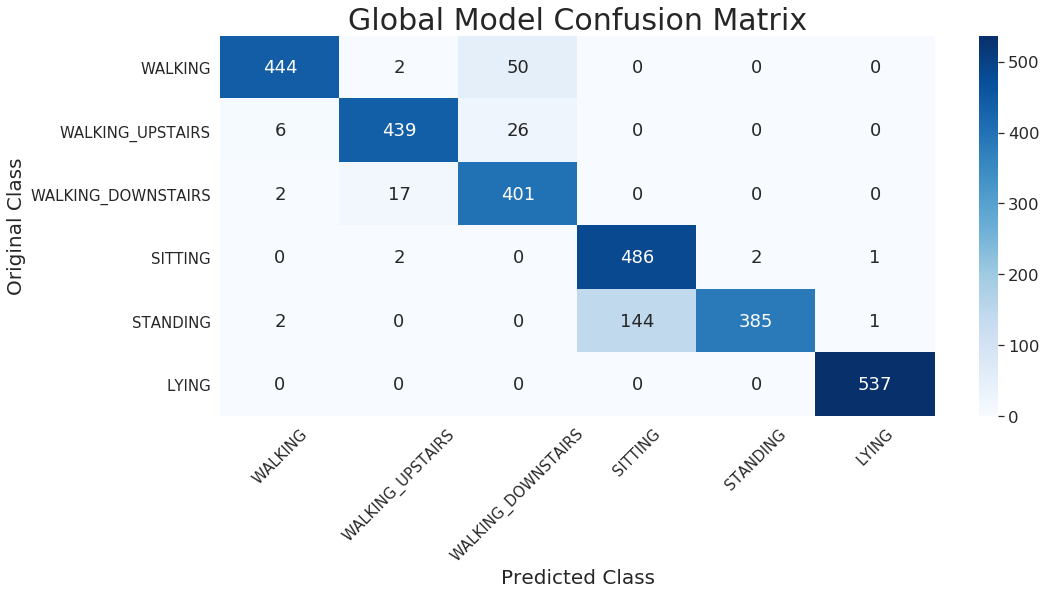

In [402]:
CONFUSION_MATRIX(y_test,y_pred)